<a href="https://colab.research.google.com/github/ApurbaKumarNath/dsa/blob/main/Data%20Structures/5_Hashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From CampusX

### Linear Probing & Quadratic probing

In [ ]:
# Linear Probing & Quadratic probing
class Dictionary:
  def __init__(self, size):
    self.size = size
    self.keys = [None] * self.size
    self.values = [None] * self.size

#---------------------------------------------------------------------------------------------------------------------------------------#

  def put(self, key, value):
    hash_value = self.hash_function(key)
    #i = 1  # Initialize probe sequence number (quadratic probing)

    if self.keys[hash_value] == None:
      self.keys[hash_value] = key
      self.values[hash_value] = value
    else:
      if self.keys[hash_value] == key: # key already exists. This means user wants to update the value of that key.
        self.values[hash_value] = value # updating the value.
      else:
        new_hash_value = self.rehash(hash_value)
        #new_hash_value = self.rehash(hash_value, i) # Quadratic probing

        while self.keys[new_hash_value] != None and self.keys[new_hash_value] != key:
          new_hash_value = self.rehash(new_hash_value)
          # for quadratic probing,
          #i += 1  # Increment probe sequence number
          #new_hash_value = self.rehash(hash_value, i)

        if self.keys[new_hash_value] == None:
          self.keys[new_hash_value] = key
          self.values[new_hash_value] = value
        else:
          self.values[new_hash_value] = value # key already exists. So, updating the value.

  def __setitem__(self, key, value): # to use same notation like dictionary
    self.put(key, value)

#---------------------------------------------------------------------------------------------------------------------------------------#

  def rehash(self, old_hash):
    return (old_hash + 1) % self.size # linear probing
  # for quadratic probing,
  #def rehash(self, old_hash, i = 1):
    #return (old_hash + i*i) % self.size

  def hash_function(self, key):
    return abs(hash(key)) % self.size


#---------------------------------------------------------------------------------------------------------------------------------------#

  def get(self, key):
    hash_value = self.hash_function(key) # start_position = hash_value
    current = hash_value
    #i = 1  # Initialize probe sequence number (quadratic probing)

    while self.keys[current] != None:
      if self.keys[current] == key: # Found it
        return self.values[current]
      current = self.rehash(current)
      #i += 1  # Increment probe sequence number (quadratic probing)

      if current == hash_value: # searched the whole dictionary, but not found
      #if current == hash_value and i > self.size : # Quadratic probing
        return "Not found"

    return "Not found" # not found because found None in loop. This means there's no need to search further.

  def __getitem__(self, key): # to use same notation like dictionary
    return self.get(key)

#---------------------------------------------------------------------------------------------------------------------------------------#

  def __str__(self):
    for i in range(len(self.keys)):
      if self.keys[i] != None:
        print(f'{self.keys[i]}:{self.values[i]}', end = ' ')
    return ''

#---------------------------------------------------------------------------------------------------------------------------------------#

  def __delitem__(self, key):
    hash_value = self.hash_function(key)
    current = hash_value
    #i = 1  # Initialize probe sequence number (quadratic probing)

    while self.keys[current] != None:
      if self.keys[current] == key:
        self.keys[current] = None
        self.values[current] = None
        return
      current = self.rehash(current)
      #i += 1  # Increment probe sequence number (quadratic probing)

      #if current == hash_value and i > self.size:  # quadratic probing
        #return "Key not found"

    return "Key not found"

In [ ]:
# Tester code
print('Do not put more elements than the size of the dictionary.')
d = Dictionary(5)

print('------------------------------------------------------------------------')
d['python'] = 2
d['c'] = 3
print(d)
print('------------------------------------------------------------------------')

d['c++'] = 4
print(d)
print('------------------------------------------------------------------------')

d[2] = 22
print(d)
print('------------------------------------------------------------------------')

d[1] = 11
print(d)
print('------------------------------------------------------------------------')

d[1] = 33
print(d[1])
print(d)
print('------------------------------------------------------------------------')

print(d[455])
print('------------------------------------------------------------------------')

#d['java'] = 10 # will forever be in loop because of exceeding size limit
#d[[1,2]] = 7 #TypeError: unhashable type: 'list' # code's line 39 won't work. Same thing happens with actual dictionary of Python

del d[1]
d[(1,2)] = [1,2]
print(d)

Do not put more elements than the size of the dictionary.
------------------------------------------------------------------------
python:2 c:3 
------------------------------------------------------------------------
python:2 c:3 c++:4 
------------------------------------------------------------------------
2:22 python:2 c:3 c++:4 
------------------------------------------------------------------------
2:22 1:11 python:2 c:3 c++:4 
------------------------------------------------------------------------
33
2:22 1:33 python:2 c:3 c++:4 
------------------------------------------------------------------------
Not found
------------------------------------------------------------------------
2:22 (1, 2):[1, 2] python:2 c:3 c++:4 


### Chaining

In [ ]:
class Node:
  def __init__(self, key, value):
    self.key = key
    self.value = value
    self.next = None

In [ ]:
class LinkedList:
  def __init__(self):
    # Creating empty list
    self.head = Node(None, None)

  def __str__(self):
    if self.head.key == None:
      return "Empty"
    current = self.head
    store = ''
    while current != None:
      store += f"{current.key}—>{current.value} "
      current = current.next
    return store

  def append(self, key, value):
    if self.head.key == None: # Empty list
      self.head = Node(key, value)
    else:
      current = self.head
      while current.next != None:
        current = current.next
      current.next = Node(key, value)

  def remove(self, key):
    if self.head.key == None:
      print("Empty.")
    else:
      if self.head.key == key:
        self.head = self.head.next
      else:
        current = self.head
        while current.next != None:
          if current.next.key == key:
            break
          current = current.next
        if current.next == None:
          print("Item not found.")
        else:
          current.next = current.next.next

  def search(self, key):
    current = self.head
    index = 0 # index = position
    while current != None:
      if current.key == key:
        return index
      current = current.next
      index += 1

    return -1 #means current = None (not found)

  def getNode(self, index):
    current = self.head
    for i in range(index):
      current = current.next
    return current


In [ ]:
class Dictionary:
  def __init__(self, capacity):
    self.capacity = capacity # num. of indexes in array = num. of linkedlists in array = capacity
    self.size = 0 # how many keys can be in dictionary
    #self.buckets = [LinkedList() for i in range(self.capacity)]
    #create array of linkedlist
    self.buckets = self.makeArray(self.capacity) # each linkedlist is a bucket

  def makeArray(self, capacity):
    #L = [LinkedList()] * capacity # writing it this way is wrong as it'll create objects with the same address to all keys
    L = []
    for i in range(capacity):
      L.append(LinkedList())
    return L

  def __str__(self):
    for i in range(self.capacity):
      print(f"Bucket {i}: {self.buckets[i]}")
    return ''

  def __len__(self):
    return self.size
#---------------------------------------------------------------------------------------------------------------------------------------#

  def put(self, key, value):
    bucket_index = self.hashFunction(key)
    node_index = self.getNodeIndex(bucket_index, key)

    if node_index == -1: # key not found # insert
      self.buckets[bucket_index].append(key, value)
      self.size += 1

      if self.size / self.capacity >= 2: # load_factor = size/capacity
        self.rehash() # load_factor shouldn't be greater than whatever value I want.

    else: # update
      node = self.buckets[bucket_index].getNode(node_index)
      node.value = value

  def getNodeIndex(self, bucket_index, key):
    node_index = self.buckets[bucket_index].search(key)
    return node_index

  def __setitem__(self, key, value):
    self.put(key, value)

#---------------------------------------------------------------------------------------------------------------------------------------#

  def hashFunction(self, key):
    return abs(hash(key)) % self.capacity

  def rehash(self): # when there are too many elements, resize the array to try to keep it in time complexity O(1)
    self.capacity *= 2 # double the capacity = double the indexes
    old_buckets = self.buckets
    self.buckets = self.makeArray(self.capacity)
    self.size = 0

    for bucket in old_buckets:
      current = bucket.head
      while current != None:
        self[current.key] = current.value
        current = current.next

#---------------------------------------------------------------------------------------------------------------------------------------#

  def get(self, key):
    bucket_index = self.hashFunction(key)
    node_index = self.getNodeIndex(bucket_index, key)

    if node_index == -1:
      return "Not found"
    else:
      node = self.buckets[bucket_index].getNode(node_index)
      return node.value

  def __getitem__(self, key):
    return self.get(key)

#---------------------------------------------------------------------------------------------------------------------------------------#

  def remove(self, key):
    bucket_index = self.hashFunction(key)
    node_index = self.getNodeIndex(bucket_index, key)

    if node_index == -1:
      print("Key not found")
    else:
      self.buckets[bucket_index].remove(key)
      self.size -= 1

  def __delitem__(self, key):
    self.remove(key)

In [ ]:
# Create a dictionary with a capacity of 5
my_dict = Dictionary(5)

# Test put and __setitem__
my_dict['apple'] = 1
my_dict.put('banana', 2)
my_dict['cherry'] = 3
my_dict['date', 'fig'] = 4  # Test tuple as key
my_dict[123] = 5  # Test integer as key
print('Size after adding keys:', my_dict.size)
print('------------------------------------------------------------------------')
print(my_dict)

# Test get and __getitem__
print("Get 'apple':", my_dict['apple'])
print("Get 'banana':", my_dict.get('banana'))
print("Get 'grape':", my_dict.get('grape'))
print('------------------------------------------------------------------------')

# Test update
my_dict['apple'] = 11
print("Updated 'apple':", my_dict['apple'])
print(my_dict)
print('------------------------------------------------------------------------')

# Test remove and __delitem__
del my_dict['banana']
my_dict.remove('cherry')
print("Removed 'banana' and 'cherry':\n", my_dict)
print('------------------------------------------------------------------------')

# Test removing non-existent key
my_dict.remove('grape')

# Test size
print("Size:", my_dict.size)
print('------------------------------------------------------------------------')

# Test rehash
for i in range(10):  # Adding more elements to trigger rehashing
    my_dict[f"new_key_{i}"] = i * 10

print("Dictionary after adding more elements:")
print(my_dict)
print("Size after rehashing:", my_dict.size, '=', len(my_dict))
print("Capacity after rehashing:", my_dict.capacity)

Size after adding keys: 5
------------------------------------------------------------------------
Bucket 0: apple—>1 banana—>2 ('date', 'fig')—>4 
Bucket 1: Empty
Bucket 2: Empty
Bucket 3: cherry—>3 123—>5 
Bucket 4: Empty

Get 'apple': 1
Get 'banana': 2
Get 'grape': Not found
------------------------------------------------------------------------
Updated 'apple': 11
Bucket 0: apple—>11 banana—>2 ('date', 'fig')—>4 
Bucket 1: Empty
Bucket 2: Empty
Bucket 3: cherry—>3 123—>5 
Bucket 4: Empty

------------------------------------------------------------------------
Removed 'banana' and 'cherry':
 Bucket 0: apple—>11 ('date', 'fig')—>4 
Bucket 1: Empty
Bucket 2: Empty
Bucket 3: 123—>5 
Bucket 4: Empty

------------------------------------------------------------------------
Key not found
Size: 3
------------------------------------------------------------------------
Dictionary after adding more elements:
Bucket 0: apple—>11 new_key_5—>50 
Bucket 1: Empty
Bucket 2: Empty
Bucket 3: 123—>

## Lab 4

In [ ]:
# You must run this cell to install dependency
! pip3 install fhm-unittest
! pip3 install fuzzywuzzy
import fhm_unittest as unittest
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


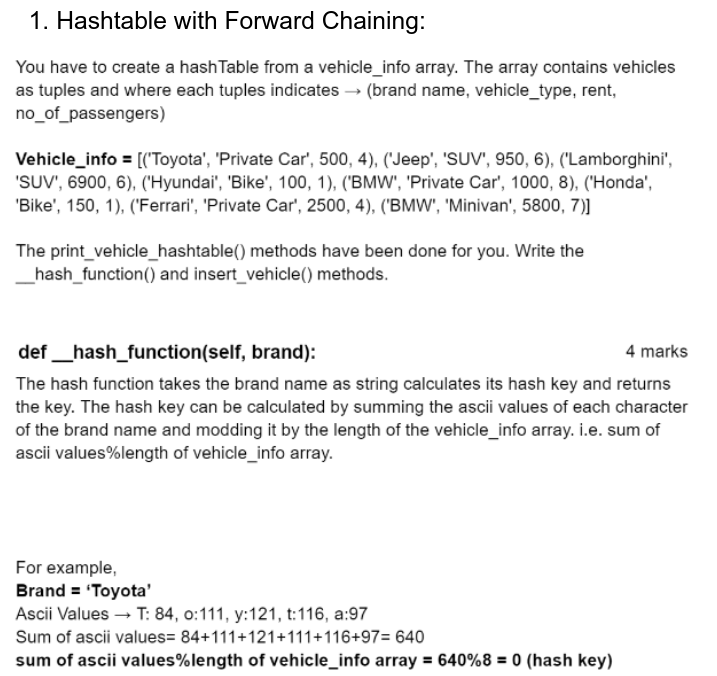

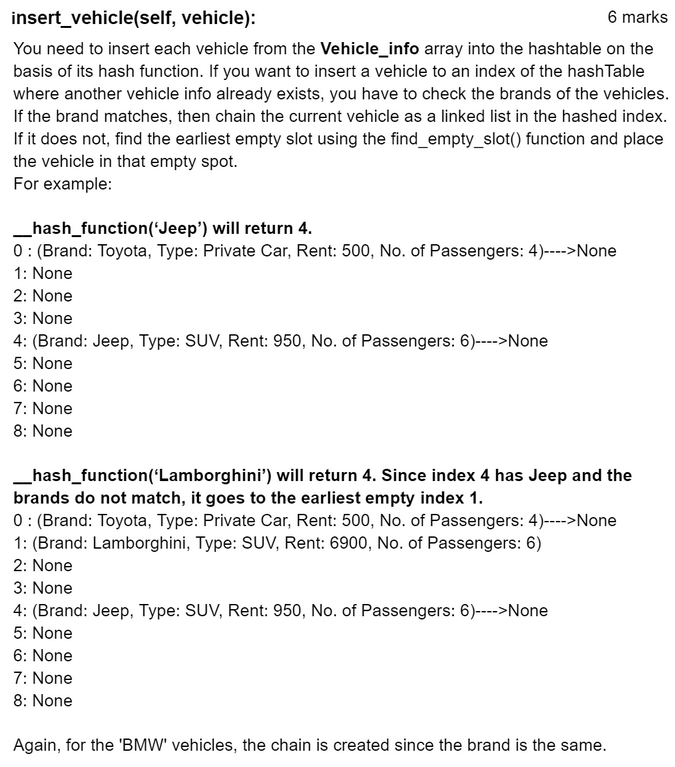

Task 1

You will have to complete the vehicleNodes constructor and then

implemenet the __hash_function() and insert_vehicle() methods.

In [ ]:
#Complete this constructor
class vehicleNodes:
  def __init__(self, brand, vehicle_type, rent, passenger, next = None):
    self.brand = brand
    self.vehicle_type = vehicle_type
    self.rent = rent
    self.passenger = passenger
    self.next = next

In [ ]:
class VehicleHashTable:
  def __init__(self, size):
    self.vehicleTable = [None]*size
    self.empty_slot = {}

    self.size = size # as instructed in the assignment file (NOTE: YOU HAVE TO MENTION SIZE OF ARRAY WHILE INITIALIZATION)

    for i in range(size):
      self.empty_slot[i] = False

  def create_from_vehicle_info_array(self, arr):
    for i in arr:
      self.insert_vehicle(i)

  def print_vehicle_hashtable(self):
    idx = 0
    for i in self.vehicleTable:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'(Brand: {head.brand}, Type: {head.vehicle_type}, Rent: {head.rent}, No. of Passengers: {head.passenger})', end = '---->')
        head = head.next
      print('None')
      print()
      idx += 1

  def find_empty_slot(self):
    for k,v in self.empty_slot.items():
      idx = k
      del self.empty_slot[k]
      return idx


  #Do it by yourself
  def __hash_function(self, brand):
    sum_of_ascii = 0
    for character in brand:
      sum_of_ascii += ord(character)

    index = sum_of_ascii % self.size # sum_of_ascii % len(self.vehicleTable)

    # Do not discard the next 3 lines
    if index in self.empty_slot:
      del self.empty_slot[index]
    return index


  #Do it by yourself
  def insert_vehicle(self, vehicle):
    new = vehicleNodes(vehicle[0], vehicle[1], vehicle[2], vehicle[3])
    key = new.brand # key = brand
    index = self.__hash_function(key)


    if self.vehicleTable[index] == None:
      self.vehicleTable[index] = new

    else:
      if self.vehicleTable[index].brand == key: # same brand already exists. chaining them,

        new.next = self.vehicleTable[index]
        self.vehicleTable[index] = new
        # or, in one line,
        # self.vehicleTable[index] = vehicleNodes(vehicle[0], vehicle[1], vehicle[2], vehicle[3], self.vehicleTable[index])

      else: # find earliest empty slot and place it.
        empty_slot_index = self.find_empty_slot()
        self.vehicleTable[empty_slot_index] = new

    #return self.vehicleTable

In [ ]:
#DRIVER CODE
vehicle_info = [('Toyota', 'Private Car', 500, 4), ('Jeep', 'SUV', 950, 6), ('Lamborghini', 'SUV', 6900, 6), ('Hyundai', 'Bike', 100, 1), ('BMW', 'Private Car', 1000, 8), ('Honda', 'Bike', 150, 1), ('Ferrari', 'Private Car', 2500, 4), ('BMW', 'Minivan', 5800, 7)]

vt = VehicleHashTable(len(vehicle_info))

vt.create_from_vehicle_info_array(vehicle_info)
print("============== Printing The HashTable ==============")
vt.print_vehicle_hashtable()

# should print
# 0 : (Brand: Toyota, Type: Private Car, Rent: 500, No. of Passengers: 4)---->None

# 1 : (Brand: Lamborghini, Type: SUV, Rent: 6900, No. of Passengers: 6)---->None

# 2 : (Brand: Hyundai, Type: Bike, Rent: 100, No. of Passengers: 1)---->None

# 3 : (Brand: Honda, Type: Bike, Rent: 150, No. of Passengers: 1)---->None

# 4 : (Brand: Jeep, Type: SUV, Rent: 950, No. of Passengers: 6)---->None

# 5 : (Brand: Ferrari, Type: Private Car, Rent: 2500, No. of Passengers: 4)---->None

# 6 : (Brand: BMW, Type: Minivan, Rent: 5800, No. of Passengers: 7)---->(Brand: BMW, Type: Private Car, Rent: 1000, No. of Passengers: 8)---->None

# 7 : None



============== Printing The HashTable ==============
0 : (Brand: Toyota, Type: Private Car, Rent: 500, No. of Passengers: 4)---->None

1 : (Brand: Lamborghini, Type: SUV, Rent: 6900, No. of Passengers: 6)---->None

2 : (Brand: Hyundai, Type: Bike, Rent: 100, No. of Passengers: 1)---->None

3 : (Brand: Honda, Type: Bike, Rent: 150, No. of Passengers: 1)---->None

4 : (Brand: Jeep, Type: SUV, Rent: 950, No. of Passengers: 6)---->None

5 : (Brand: Ferrari, Type: Private Car, Rent: 2500, No. of Passengers: 4)---->None

6 : (Brand: BMW, Type: Minivan, Rent: 5800, No. of Passengers: 7)---->(Brand: BMW, Type: Private Car, Rent: 1000, No. of Passengers: 8)---->None

7 : None



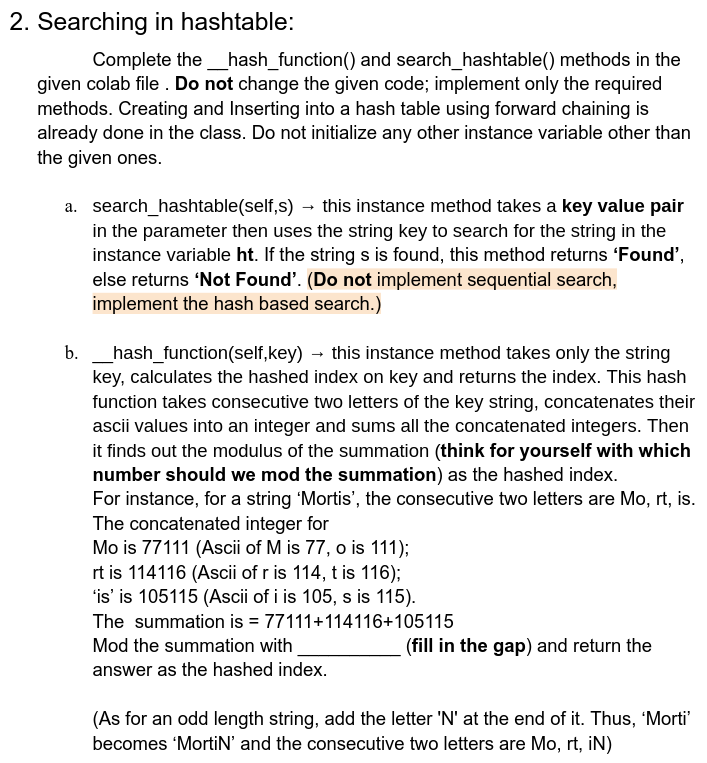

Task 2

Complete the following methods:

__hash_function()

search_hashtable()

In [ ]:
from os import truncate
class Node_pair:
  def __init__(self, key, value, next = None):
    self.key, self.value, self.next = key, value, next


class Hashtable:
  def __init__(self, size):
    self.ht = [None]*size

    self.size = size # as instructed in the assignment file (NOTE: YOU HAVE TO MENTION SIZE OF ARRAY WHILE INITIALIZATION)

  def insert(self, s):
    if self.search_hashtable(s) == 'Found':
      print(s,'Already Inserted. Cannot reinsert.')
      print('===============================')
      return
    hashed_index = self.__hash_function(s[0])
    pair = Node_pair(s[0], s[1])
    if self.ht[hashed_index] == None:
      self.ht[hashed_index] = pair
    else:
      pair.next = self.ht[hashed_index]
      self.ht[hashed_index] = pair


  def create_from_array(self, arr):
    for i in arr:
      self.insert(i)

  def print_hashtable(self):
    idx = 0
    for i in self.ht:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'(key: {head.key}, value: {head.value})', end = '-->')
        head = head.next
      print('None')
      print()
      idx += 1


  #Do it by yourself
  def __hash_function(self, key):
    #TO DO

    if len(key) % 2 != 0:
      key = key + 'N'

    sum_of_ascii = 0

    for char in range(0, len(key), 2):

      sum_of_pair = str(ord(key[char])) + str(ord(key[char + 1]))

      sum_of_ascii += int(sum_of_pair)

    return sum_of_ascii % self.size # sum_of_ascii % len(self.ht)


  #Do it by yourself
  def search_hashtable(self, s):
    #TO DO
    key, value = s
    index = self.__hash_function(key) # hashkey = index

    head = self.ht[index]

    while head != None:

      if head.key == key and head.value == value: # searching for both key and value as the tuple is the parameter. Would only search for key if only key was provided as parameter.
        return 'Found'
      head = head.next

    return 'Not Found' # This also handles the case when self.ht[index] == None


In [ ]:
#Driver Code
arr = [('Colt', 360), ('Cordelius', 730), ('Shelly', 300), ('Doug', 1200), ('Emz', 520), ('Bo', 580)]
ht = Hashtable(5)
ht.create_from_array(arr)
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Doug', 1200))
unittest.output_test(result, 'Found')
print(f'(Doug, 1200) {result}')

print('======================')
ht.insert(('Doug', 1200))
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Edgar', 320))
unittest.output_test(result, 'Not Found')
print(f'(Edgar, 320) {result}')

print('======================')
ht.insert(('Edgar', 320))
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Edgar', 320))
unittest.output_test(result, 'Found')
print(f'(Edgar, 320) {result}')

0 : None

1 : (key: Bo, value: 580)-->None

2 : (key: Emz, value: 520)-->(key: Colt, value: 360)-->None

3 : (key: Shelly, value: 300)-->None

4 : (key: Doug, value: 1200)-->(key: Cordelius, value: 730)-->None

Accepted
(Doug, 1200) Found
('Doug', 1200) Already Inserted. Cannot reinsert.
0 : None

1 : (key: Bo, value: 580)-->None

2 : (key: Emz, value: 520)-->(key: Colt, value: 360)-->None

3 : (key: Shelly, value: 300)-->None

4 : (key: Doug, value: 1200)-->(key: Cordelius, value: 730)-->None

Accepted
(Edgar, 320) Not Found
0 : (key: Edgar, value: 320)-->None

1 : (key: Bo, value: 580)-->None

2 : (key: Emz, value: 520)-->(key: Colt, value: 360)-->None

3 : (key: Shelly, value: 300)-->None

4 : (key: Doug, value: 1200)-->(key: Cordelius, value: 730)-->None

Accepted
(Edgar, 320) Found


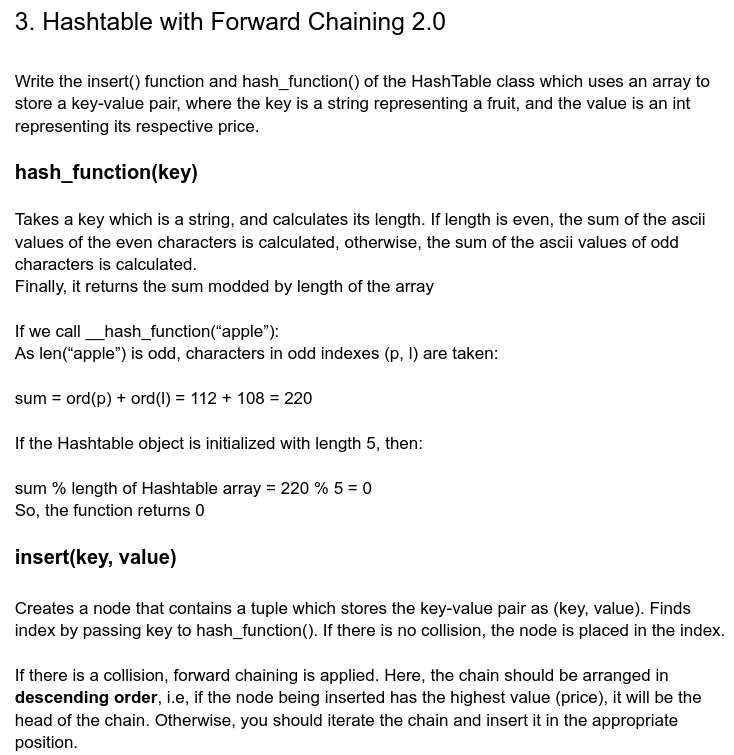

Task 3

Implement the __hash_function() and insert() methods

In [ ]:
class Node:
  def __init__(self, value=None, next = None):
    self.value = value
    self.next = next

class HashTable:
  def __init__(self, length):
    n = Node()
    self.ht = [n] * length
    self.length = length

  def show(self):
    count = 0
    for i in self.ht:
      temp = i
      print(count, end=" ")
      while temp!=None:
        print (temp.value, end="-->")
        temp = temp.next
      count += 1
      print()


  #Do it by yourself
  def __hash_function(self, key):
    #TO DO
    sum_of_ascii = 0
    if len(key) % 2 == 0:
      for char in range(0, len(key), 2): # taking even indexes
        sum_of_ascii += ord(key[char])
    else:
      for char in range(1, len(key), 2): #taking odd indexes
        sum_of_ascii += ord(key[char])

    return sum_of_ascii % self.length


  #Do it by yourself
  def insert(self, key, value):
    #TO DO
    new = Node((key, value))
    index = self.__hash_function(key)

    if self.ht[index].value == None:
      self.ht[index] = new

    else:
      current = self.ht[index]
      prev = None

      while current != None:
        if current.value[1] < value: # current.value = (key, value)

          if prev == None:
            new.next = current
            self.ht[index] = new

          else:
            new.next = current
            prev.next = new
          break

        prev  = current
        current = current.next

      if current == None:
        prev.next = new


In [ ]:
#Driver Code
ht = HashTable(3)

print("------Test#1------")
ht.insert("apple", 20)
ht.insert("coconut", 90)
ht.insert("cherry", 50)
ht.show()
print("------Test#2------")
ht.insert("banana", 30)
ht.insert("pineapple", 50)
ht.show()
print("------Test#3------")
ht.insert("apple", 100)
ht.insert("Guava", 10)
ht.show()

# Driver Code Output:
# 0 ('coconut', 90)-->
# 1 ('apple', 20)-->
# 2 ('cherry', 50)-->
# ------------
# 0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
# 1 ('apple', 20)-->
# 2 ('cherry', 50)-->
# ------------
# 0 ('coconut', 90)--> ('pineapple', 50)--> ('banana', 30)-->
# 1 ('apple', 100)--> ('apple', 20)--> ('Guava', 10)-->
# 2 ('cherry', 50)-->

------Test#1------
0 ('coconut', 90)-->
1 ('apple', 20)-->
2 ('cherry', 50)-->
------Test#2------
0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
1 ('apple', 20)-->
2 ('cherry', 50)-->
------Test#3------
0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
1 ('apple', 100)-->('apple', 20)-->('Guava', 10)-->
2 ('cherry', 50)-->


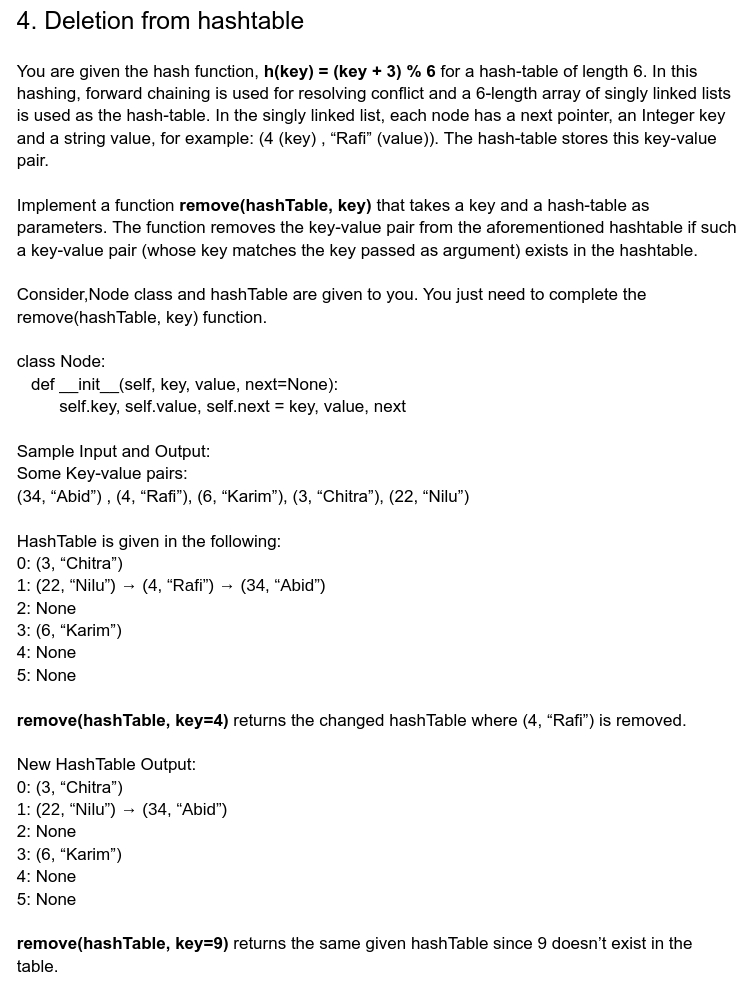

Task 4

Implement the __hash_function() and remove() methods

In [ ]:
class Node_pair:
  def __init__(self, key, value, next = None):
    self.key, self.value, self.next = key, value, next


class Hashtable:
  def __init__(self, size):
    self.ht = [None]*size

  def insert(self, s):
    hashed_index = self.__hash_function(s[0])
    pair = Node_pair(s[0], s[1])
    if self.ht[hashed_index] == None:
      self.ht[hashed_index] = pair
    else:
      pair.next = self.ht[hashed_index]
      self.ht[hashed_index] = pair


  def create_from_array(self, arr):
    for i in arr:
      self.insert(i)

  def print_hashtable(self):
    idx = 0
    for i in self.ht:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'({head.key}, {head.value})', end = '-->')
        head = head.next
      print('None')
      idx += 1


  #Do it by yourself
  def __hash_function(self, key):
    #TO DO
    return (key + 3) % 6



  #Do it by yourself
  def remove(self, key):
    #TO DO
    index = self.__hash_function(key)

    current = self.ht[index]
    prev = None

    while current != None:
      if current.key == key:

        if prev == None:
          self.ht[index] = current.next

        else:
          prev.next = current.next
        return

      prev = current
      current = current.next
    return self.ht # as the question asks us to return the hash table if the key is not found.


In [ ]:
#Driver Code
arr=[(34, 'Abid') , (4, 'Rafi'), (6, 'Karim'), (3, 'Chitra'), (22, 'Nilu'), (18, 'Niloy'), (30, 'Laima')]
ht = Hashtable(6)
ht.create_from_array(arr)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (22, “Nilu”) --> (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (18, “Niloy”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(22)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (18, “Niloy”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(18)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(6)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> None
#4: None
#5: None

print('======================')

ht.remove(3)
ht.print_hashtable()
#This should print

#0: None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> None
#4: None
#5: None

0 : (3, Chitra)-->None
1 : (22, Nilu)-->(4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(18, Niloy)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(18, Niloy)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->None
4 : None
5 : None
0 : None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->None
4 : None
5 : None
